In [52]:
#加载包
import numpy as np
import os
import pickle
import io
import re
import jieba
import random
import collections
import pandas as pd
import jieba.analyse
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image,ImageSequence
plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False  

In [2]:
#加载停用词
file = open("停用词.txt",encoding='utf8') 
stopword = [line.lstrip().rstrip() for line in file.readlines()]
file.close()

In [3]:
#加载情感词典到jieba
jieba.load_userdict('正面情绪词.txt')
jieba.load_userdict('负面情绪词.txt')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.837 seconds.
Prefix dict has been built succesfully.


In [4]:
#数据处理
def seg_word(text):
    text = re.sub("[\s+\.\!\/_,$%^*(+\"\']+|[+——！，。？、~@#￥%……&*（）]+|[\d+]|[a-zA-Z+]|⊙|∀|·|【|】", "",str(text))
    text = text.replace('-','')
    word_list = [i for i in jieba.cut(text) if i not in stopword]
    return word_list

In [5]:
file = open("停用词.txt",encoding='utf8') 
stopword = [line.lstrip().rstrip() for line in file.readlines()]
file.close()
flags = ('n', 'an','nr', 'ns', 'nt', 'nz', 'v','vn','vd','d','vg','vl','nl','ng','a','al','z','b')
#分词
def jieba_cut(text):
    text = re.sub("[\s+\.\!\/_,$%^*(+\"\']+|[+——！，。？、~@#￥%……&*（）；：;)]+|[\d+]|[a-zA-Z+]|⊙|∀|·|【|】|\[|\]|\/|\\|", "",str(text))
    words = [w.word for w in jp.cut(text) if w.flag in flags and w.word not in stopword and len(w.word)>1]
    return words
def removeStopword(sentence):
    '''
    带词性标注，对句子进行分词，不排除停词等
    :param sentence:输入字符
    :return:
    '''
    sentence = re.sub("[\s+\.\!\/_,$%^*(+\"\']+|[\]\[：:；+——！，。？、~@#￥%……&*（）]+|[\d+]|[a-zA-Z+]|⊙|∀|·|【|】", "",str(sentence))
    sentence = sentence.replace('-','')
    sentence_seged = jieba.posseg.cut(sentence.strip())
    outstr = ''
    word_list = []
    for x in sentence_seged:
        if ('\u4e00' <= x.word <= '\u9fa5' and x.word not in stopword):
            outstr ="{}/{}".format(x.word,x.flag)
            word_list.append(outstr)
    return ' '.join(word_list)

def removeStopword_keyword_txt(sentence):
    '''
    带词性标注，对句子进行分词，不排除停词等
    :param sentence:输入字符
    :return:
    '''
    sentence = re.sub("[\s+\.\!\/_,$%^*(+\"\']+|[\]\[：:；+——！，。？、~@#￥%……&*（）]+|[\d+]|[a-zA-Z+]|⊙|∀|·|【|】", "",str(sentence))
    sentence = sentence.replace('-','')
    sentence_seged = jieba.posseg.cut(sentence.strip())
    outstr = ''
    word_list = []
    for x in sentence_seged:
        if ('\u4e00' <= x.word <= '\u9fa5' and x.word not in stopword):
            outstr ="{}".format(x.word)
            word_list.append(outstr)
    return ' '.join(word_list)
def seg_word(text):
    text = re.sub("[\s+\.\!\/_,$%^*(+\"\']+|[+——！，。？、~@#￥%……&*（）]+|[\d+]|[a-zA-Z+]|⊙|∀|·|【|】", "",str(text))
    text = text.replace('-','')
    word_list = [i for i in jieba.cut(text) if i not in stopword]
    return word_list
def keyword_exact(text):
    text = re.sub("[\s+\.\!\/_,$%^*(+\"\']+|[+——！，。？、~@#￥%……&*（）]+|[\d+]|[a-zA-Z+]|⊙|∀|·|【|】", "",str(text))
    text = text.replace('-','')
    text = ''.join([i for i in jieba.cut(text) if i not in stopword])
    tags = jieba.analyse.extract_tags(text, topK=200)
    return" ".join(tags)
positive_words = []
positive_word = open("正面情绪词.txt","r",encoding="utf-8").readlines()
for i in positive_word:
    positive_words.append(i.strip())       
negative_words = []
negative_word = open("负面情绪词.txt","r",encoding="utf-8").readlines()
for i in negative_word:
    negative_words.append(i.strip())
privative_words = []
privative_word = open("否定词.txt","r",encoding="utf-8").readlines()
for i in privative_word:
    privative_words.append(i.strip())
adverb_of_degree_words1 = []
adverb_of_degree1 = open("2倍.txt","r",encoding="utf-8").readlines()
for i in adverb_of_degree1:
    adverb_of_degree_words1.append(i.strip())
adverb_of_degree_words2 = []
adverb_of_degree2 = open("1.5倍.txt","r",encoding="utf-8").readlines()
for i in adverb_of_degree2:
    adverb_of_degree_words2.append(i.strip())
adverb_of_degree_words3 = []
adverb_of_degree3 = open("1.25倍.txt","r",encoding="utf-8").readlines()
for i in adverb_of_degree3:
    adverb_of_degree_words3.append(i.strip())
adverb_of_degree_words4 = []
adverb_of_degree4 = open("1.2倍.txt","r",encoding="utf-8").readlines()
for i in adverb_of_degree4:
    adverb_of_degree_words4.append(i.strip())
adverb_of_degree_words5 = []
adverb_of_degree5 = open("0.8倍.txt","r",encoding="utf-8").readlines()
for i in adverb_of_degree5:
    adverb_of_degree_words5.append(i.strip())
adverb_of_degree_words6 = []
adverb_of_degree6 = open("0.5倍.txt","r",encoding="utf-8").readlines()
for i in adverb_of_degree6:
    adverb_of_degree_words6.append(i.strip())
def classify_words(dict_data):
    z = 0
    data = []
    for k,v in enumerate(dict_data):     
        w = 0
        if v in positive_words:   #为正面情感词
            w += 1        
            #print(v)
            for i in range(z, int(k)):
                if dict_data[i] in privative_words:
                    for j in range(z, i):   #程度词+否定词+情感词
                        if (dict_data[j] in adverb_of_degree_words6 or dict_data[j] in adverb_of_degree_words5 or \
                                dict_data[j] in adverb_of_degree_words4 or dict_data[j] in adverb_of_degree_words3 or \
                                dict_data[j] in adverb_of_degree_words2 or dict_data[j] in adverb_of_degree_words1):
                            w = w * (-1) * 2
                            #print(w)
                        break
                    for j in range(i, int(k)):  #否定词+程度词+情感词
                        if (dict_data[j] in adverb_of_degree_words6 or dict_data[j] in adverb_of_degree_words5 or \
                                dict_data[j] in adverb_of_degree_words4 or dict_data[j] in adverb_of_degree_words3 or \
                                dict_data[j] in adverb_of_degree_words2 or dict_data[j] in adverb_of_degree_words1):
                            w = w * 0.5
                            #print(w)
                        break
                elif dict_data[i] in adverb_of_degree_words1:
                    w =w * 2
                    #print(w)
                elif dict_data[i] in adverb_of_degree_words2:
                    w =w * 1.5
                    #print(w)
                elif dict_data[i] in adverb_of_degree_words3:
                    w =w * 1.25
                    #print(w)
                elif dict_data[i] in adverb_of_degree_words4:
                    w =w * 1.2
                    #print(w)
                elif dict_data[i] in adverb_of_degree_words5:
                    w =w * 0.8
                    #print(w)
                elif dict_data[i] in adverb_of_degree_words6:
                    w =w * 0.5
                    #print(w)
            z = int(k) + 1
        if v in negative_words:   #为负面情感词
            w -= 1
            for i in range(z, int(k)):
                if dict_data[i] in privative_words:
                    for j in range(z, i):
                        #程度词+否定词+情感词
                        if (dict_data[j] in adverb_of_degree_words6 or dict_data[j] in adverb_of_degree_words5 or \
                                dict_data[j] in adverb_of_degree_words4 or dict_data[j] in adverb_of_degree_words3 or \
                                dict_data[j] in adverb_of_degree_words2 or dict_data[j] in adverb_of_degree_words1):
                            w = w * (-1)*2
                        break
                    for j in range(i,int(k)):
                        #否定词+程度词+情感词
                        if (dict_data[j] in adverb_of_degree_words6 or dict_data[j] in adverb_of_degree_words5 or \
                                 dict_data[j] in adverb_of_degree_words4 or dict_data[j] in adverb_of_degree_words3 or \
                                 dict_data[j] in adverb_of_degree_words2 or dict_data[j] in adverb_of_degree_words1):
                                w = w * 0.5
                        break
                if dict_data[i] in adverb_of_degree_words1:
                    w *= 2
                elif dict_data[i] in adverb_of_degree_words2:
                    w *= 1.5
                elif dict_data[i] in adverb_of_degree_words3:
                    w *= 1.25
                elif dict_data[i] in adverb_of_degree_words4:
                    w *= 1.2
                elif dict_data[i] in adverb_of_degree_words5:
                    w *= 0.8
                elif dict_data[i] in adverb_of_degree_words6:
                    w *= 0.5
            z = int(k)+1
        data.append(w)
    seg = np.sum(data)
    return seg
    p = 0
    if seg > 0:
        p=1
    if seg < 0:
        p = -1
    return p
#调用用情感分析
def appaly_seg(text):
    #切词
    word_list = seg_word(text)
    #情感分析
    seg = classify_words(word_list)
    return seg



In [6]:
def removeStopword(sentence):
    '''
    带词性标注，对句子进行分词，不排除停词等
    :param sentence:输入字符
    :return:
    '''
    sentence = re.sub("[\s+\.\!\/_,$%^*(+\"\']+|[\]\[：:；+——！，。？、~@#￥%……&*（）]+|[\d+]|[a-zA-Z+]|⊙|∀|·|【|】", "",str(sentence))
    sentence = sentence.replace('-','')
    sentence_seged = jieba.posseg.cut(sentence.strip())
    outstr = ''
    word_list = []
    for x in sentence_seged:
        if ('\u4e00' <= x.word <= '\u9fa5' and x.word not in stopword):
            outstr ="{}/{}".format(x.word,x.flag)
            word_list.append(outstr)
    return ' '.join(word_list)
#调用用情感分析
def appaly_seg(text):
    #切词
    word_list = seg_word(text)
    #情感分析
    seg = classify_words(word_list)
    return seg

In [7]:
import glob
lp = glob.glob('阶段\*')

In [8]:
def get_date(text):
    try:
        return text[0:10]
    except:
        return "无时间"

调用方法 情感分析

In [57]:
allpd = []
for path in lp:
    df1 =  pd.read_excel(path)
    df1['情感值'] = df1['评论内容'].apply(lambda x: appaly_seg(str(x)))
    df1.to_excel(path,engine='xlsxwriter')

In [9]:
df1 =  pd.read_excel(lp[0])
df1['评论时间']

0      2019-12-31 13:57
1      2019-12-31 13:57
2      2019-12-31 13:56
3      2019-12-31 15:00
4      2019-12-31 14:08
             ...       
115     2020-1-22 20:54
116     2020-1-22 21:16
117     2020-1-22 20:53
118     2020-1-22 22:39
119     2020-1-22 22:25
Name: 评论时间, Length: 120, dtype: object

In [50]:
lp[0].split('\\')[-1].replace('.xlsx','')

'第一阶段(1)'

In [10]:
df1['评论时间_'] = df1['评论时间'].apply(lambda x : get_date(str(x)))

In [41]:
df_ = df1.groupby('评论时间_').mean()['情感值']
df_.index

Index(['2019-12-31', '2020-1-20 ', '2020-1-21 ', '2020-1-22 ', '2020-1-9 0',
       'nan'],
      dtype='object', name='评论时间_')

In [43]:
df_.values

array([ 0.09538462,  0.49296296,  0.33703704,  0.13625   , -0.66666667,
        0.        ])

In [44]:
df_.index

Index(['2019-12-31', '2020-1-20 ', '2020-1-21 ', '2020-1-22 ', '2020-1-9 0',
       'nan'],
      dtype='object', name='评论时间_')

Text(0.5, 1.0, '第一阶段(1)')

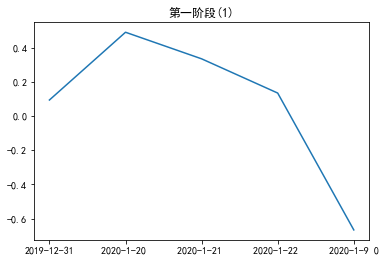

In [53]:
name = lp[0].split('\\')[-1].replace('.xlsx','')
plt.plot(df_.index[0:-1], df_.values[0:-1])
plt.title(name)

Text(0.5, 1.0, '第三阶段')

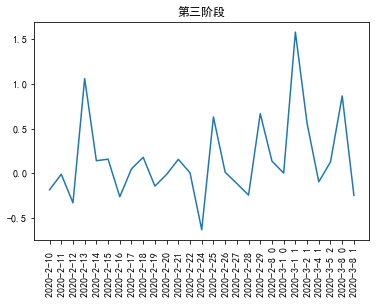

In [62]:
df1 =  pd.read_excel(lp[1])
df1['博文发布时间']
df1['评论时间_'] = df1['博文发布时间'].apply(lambda x : get_date(str(x)))
df_ = df1.groupby('评论时间_').mean()['情感值']
name = lp[1].split('\\')[-1].replace('.xlsx','')
plt.plot(df_.index[0:-1], df_.values[0:-1])
plt.xticks(rotation=90)
plt.title(name)

Text(0.5, 1.0, '第二阶段')

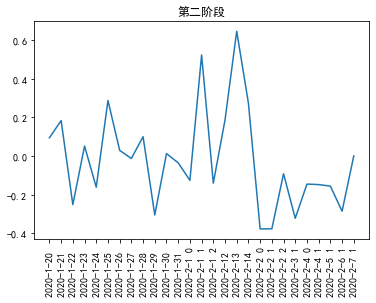

In [63]:
df1 =  pd.read_excel(lp[2])
df1['博文发布时间']
df1['评论时间_'] = df1['博文发布时间'].apply(lambda x : get_date(str(x)))
df_ = df1.groupby('评论时间_').mean()['情感值']
name = lp[2].split('\\')[-1].replace('.xlsx','')
plt.plot(df_.index[0:-1], df_.values[0:-1])
plt.xticks(rotation=90)
plt.title(name)

Text(0.5, 1.0, '第四阶段')

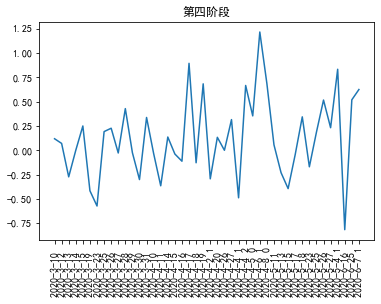

In [64]:
df1 =  pd.read_excel(lp[3])
df1['博文发布时间']
df1['评论时间_'] = df1['博文发布时间'].apply(lambda x : get_date(str(x)))
df_ = df1.groupby('评论时间_').mean()['情感值']
name = lp[3].split('\\')[-1].replace('.xlsx','')
plt.plot(df_.index[0:-1], df_.values[0:-1])
plt.xticks(rotation=90)
plt.title(name)

词频统计

In [32]:
import glob

In [35]:
import glob
lp = glob.glob('阶段\*')

In [48]:
allpd = []
for path in lp:
    df1 =  pd.read_excel(path)
    #df1['评论内容']
    df['text'] = df['评论内容'].apply(lambda x: removeStopword(str(x)))
    ALL_LIST_WORD = []
    for j in df['text'].astype('str').values.tolist():
        for i in j.split(' '):
            ALL_LIST_WORD.append(i)
    word_counts = collections.Counter(ALL_LIST_WORD)
    word_counts_top10 = word_counts.most_common(len(word_counts))
    df_ci = pd.DataFrame(word_counts_top10)
    df_ci.columns = ['词','数量']
    df_ci['词类'] = df_ci['词'].str.split('/',expand=True)[0]
    df_ci['词性'] = df_ci['词'].str.split('/',expand=True)[1]
    df_ci.to_excel(path.split('\\')[-1].replace('.xlsx','_词频.xlsx'),engine='xlsxwriter')

词云

In [12]:
def removeStopword_text(sentence):
    '''
    带词性标注，对句子进行分词，不排除停词等
    :param sentence:输入字符
    :return:
    '''
    sentence = re.sub("[\s+\.\!\/_,$%^*(+\"\']+|[\]\[：:；+——！，。？、~@#￥%……&*（）]+|[\d+]|[a-zA-Z+]|⊙|∀|·|【|】", "",str(sentence))
    sentence = sentence.replace('-','')
    sentence_seged = jieba.posseg.cut(sentence.strip())
    outstr = ''
    word_list = []
    for x in sentence_seged:
        if ('\u4e00' <= x.word <= '\u9fa5' and x.word not in stopword):
            outstr ="{}".format(x.word)
            word_list.append(outstr)
    return ' '.join(word_list)


In [16]:
text = removeStopword_text(''.join(df['评论内容'].astype('str')))
image= Image.open('底图.png')
graph = np.array(image)
tags=jieba.analyse.extract_tags(text,topK=200, withWeight=True)
tf= dict((a[0],a[1]) for a in tags)

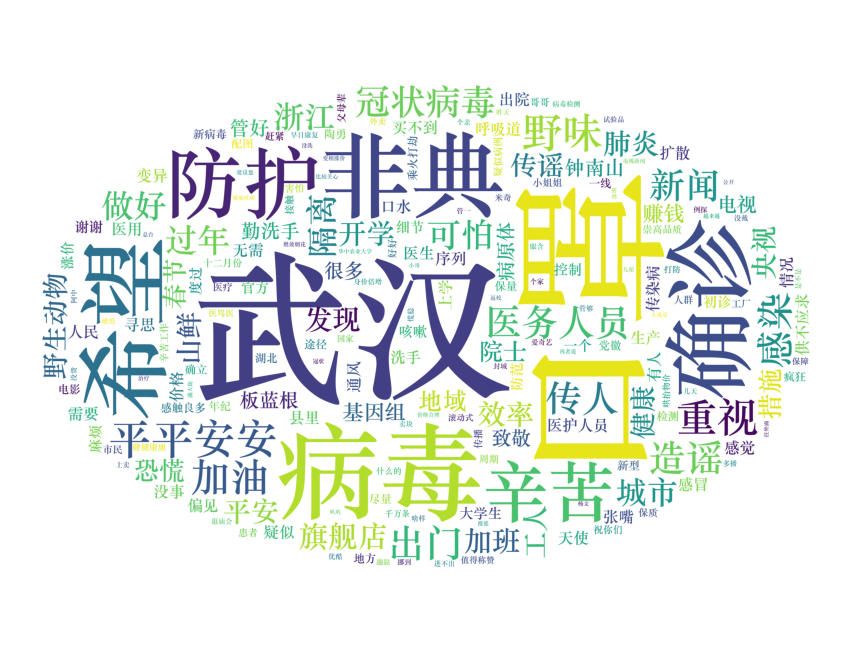

In [17]:
wc=WordCloud(font_path='STZHONGS.TTF',scale=10,background_color="white",mask=graph)
wc=wc.generate_from_frequencies(tf)
wc.to_file("词云.png")
plt.figure(figsize=(15,15))
plt.imshow(wc)
plt.axis('off')
plt.show()